# IPL Player Performance - EDA

## Introduction

The Indian Premier League (IPL) is a professional men's Twenty20 cricket league, contested by ten teams based out of ten Indian cities. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. It is usually held between March and May of every year and has an exclusive window in the ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2019 was ₹47,500 crore (6.3 billion US dollar), according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹1,150 crore (150 million US dollar) to the GDP of the Indian economy. The 2020 IPL season set a massive viewership record with 31.57 million average impressions and with an overall consumption increase of 23 per cent from the 2019 season.

## Objective

This IPL Dataset consists of Player Performance records from 2008 to 2021. Here our main objective is to do Exploratory Data Analysis on various different aspects like Most Runs, Most Wickets, Best Bowling Economy (Innings), Best Bowling Strike Rate (Innings), Fastest Centuries, Fastest Fifties, Most Runs Conceded (Innings), Most Dot Balls (Innings), Most Runs (Over), Most Sixes (Innings), Most Runs (Over), Most Fours (Innings) to extract informations and gain the better understanding to help us analyse the game even better.

## Structure of the dataset

<b>Most Runs</b> - Most Runs in the Tournament<br>
<b>Most Wickets</b> - Most Wickets in the Tournament<br>
<b>Best Bowling Economy (Innings)</b> - Best Bowling Economy in an Innings<br>
<b>Best Bowling Strike Rate (Innings)</b> - Best Bowling Strike Rate in an Innings<br>
<b>Fastest Centuries</b> - Fastest Centuries in the Tournament<br>
<b>Fastest Fifties</b> - Fastest Fifties in the Tournament<br>
<b>Most Runs Conceded (Innings)</b> - Most Runs Conceded in an Innings<br>
<b>Most Dot Balls (Innings)</b> - Most Dot Balls in an Innings<br>
<b>Most Runs (Over)</b> - Most Runs in an Over<br>
<b>Most Sixes (Innings)</b> - Most Sixes hit in an Innings<br>
<b>Most Fours (Innings)</b> - Most Fours hit in an Innings<br><br>

### Importing Libraries

In [ ]:
pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
import squarify
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")
print("Successfully imported")

Successfully imported


### Loading and Checking the Dataset

In [4]:
df_most_runs = pd.read_csv(r"C:\Users\AdmiN\Desktop\Project FOA\IPL\input\ipl-player-performance-dataset\IPL - Player Performance Dataset\IPL - Player Performance Dataset\Most Runs\Most Runs - 2020.csv")
df_most_runs.head(10)

POS            Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  \
0    1          KL Rahul   14    14   2   670  132*  55.83  518  129.34    1   
1    2    Shikhar Dhawan   17    17   3   618  106*  44.14  427  144.73    2   
2    3      David Warner   16    16   2   548   85*  39.14  407  134.64    0   
3    4      Shreyas Iyer   17    17   2   519   88*  34.60  421  123.27    0   
4    5      Ishan Kishan   14    13   4   516    99  57.33  354  145.76    0   
5    6   Quinton de Kock   16    16   2   503   78*  35.92  358  140.50    0   
6    7  Suryakumar Yadav   16    15   3   480   79*  40.00  331  145.01    0   
7    8  Devdutt Padikkal   15    15   0   473    74  31.53  379  124.80    0   
8    9       Virat Kohli   15    15   4   466   90*  42.36  384  121.35    0   
9   10    AB de Villiers   15    14   4   454   73*  45.40  286  158.74    0   

   50  4s  6s  
0   5  58  23  
1   4  67  12  
2   4  52  14  
3   3  40  16  
4   4  36  30  
5   4  46  22  
6   4  61  11  
7   5  51   8  
8   3  23  11  
9   5  33  23

#### POS will not affect our analysis, so we are dropping the POS column from the dataset.

In [5]:
df_most_runs = df_most_runs.drop(columns = ['POS'])

### Checking Shape of the Dataset

In [50]:
print("Shape of the Dataset:", df_most_runs.shape)

Shape of the Dataset: (133, 13)


### Checking number of columns present

In [52]:
df_most_runs.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s', '6s'],
      dtype='object')

### Information about the Dataset

In [6]:
df_most_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  133 non-null    object 
 1   Mat     133 non-null    int64  
 2   Inns    133 non-null    int64  
 3   NO      133 non-null    int64  
 4   Runs    133 non-null    int64  
 5   HS      133 non-null    object 
 6   Avg     133 non-null    float64
 7   BF      133 non-null    int64  
 8   SR      133 non-null    float64
 9   100     133 non-null    int64  
 10  50      133 non-null    int64  
 11  4s      133 non-null    int64  
 12  6s      133 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 13.6+ KB


In [53]:
df_most_runs.describe()

Mat        Inns          NO        Runs         Avg          BF  \
count  133.000000  133.000000  133.000000  133.000000  133.000000  133.000000   
mean     9.631579    6.631579    1.616541  139.157895   19.366241  105.714286   
std      4.893523    5.030925    1.550766  167.293103   18.053343  122.253870   
min      1.000000    1.000000    0.000000    0.000000    0.000000    1.000000   
25%      5.000000    2.000000    0.000000   10.000000    6.000000   12.000000   
50%     10.000000    5.000000    1.000000   59.000000   15.000000   53.000000   
75%     14.000000   11.000000    2.000000  232.000000   29.900000  169.000000   
max     17.000000   17.000000    7.000000  670.000000  101.000000  518.000000   

               SR         100          50          4s          6s  
count  133.000000  133.000000  133.000000  133.000000  133.000000  
mean   107.364737    0.037594    0.827068   11.894737    5.518797  
std     44.584031    0.227170    1.351269   15.521375    7.393283  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%     88.750000    0.000000    0.000000    0.000000    0.000000  
50%    116.840000    0.000000    0.000000    5.000000    2.000000  
75%    137.500000    0.000000    1.000000   20.000000    9.000000  
max    191.420000    2.000000    5.000000   67.000000   30.000000

### Checking whether any Null value is present in the Dataset

In [54]:
df_most_runs.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

### Checking if there any Duplicate value present in the Dataset

In [55]:
df_most_runs.duplicated().sum()

0

### Checking Unique Values for Features / Count Number of Unique Values

In [56]:
df_most_runs["100"].unique()

array([1, 2, 0], dtype=int64)

In [64]:
df_most_runs["50"].unique()

array([5, 4, 3, 2, 1, 0], dtype=int64)

### Some Statistics

In [58]:
print("Maximum number of Matches played by an individual player in a season:", df_most_runs["Mat"].max())

Maximum number of Matches played by an individual player in a season: 17


In [59]:
print("Highest Average of a player in a season:", df_most_runs["Avg"].max())

Highest Average of a player in a season: 101.0


In [60]:
print("Avarage number of Matches played by a player in a season:", df_most_runs["Mat"].mean())

Avarage number of Matches played by a player in a season: 9.631578947368421


In [68]:
df_most_runs[(df_most_runs["Avg"] > 50) & (df_most_runs["SR"] > 120)]["Player"]

0            KL Rahul
4        Ishan Kishan
31     Kieron Pollard
36    Wriddhiman Saha
37    Ruturaj Gaikwad
57       Deepak Hooda
60         Tom Curran
Name: Player, dtype: object

In [69]:
df_most_runs[(df_most_runs["Avg"] > 40) & (df_most_runs["BF"] > 100)]

Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  50  \
0          KL Rahul   14    14   2   670  132*  55.83  518  129.34    1   5   
1    Shikhar Dhawan   17    17   3   618  106*  44.14  427  144.73    2   4   
4      Ishan Kishan   14    13   4   516    99  57.33  354  145.76    0   4   
8       Virat Kohli   15    15   4   466   90*  42.36  384  121.35    0   3   
9    AB de Villiers   15    14   4   454   73*  45.40  286  158.74    0   5   
10   Faf du Plessis   13    13   2   449   87*  40.81  319  140.75    0   4   
14      Eoin Morgan   14    14   4   418   68*  41.80  302  138.41    0   1   
24  Kane Williamson   12    11   4   317    67  45.28  237  133.75    0   3   
27      Chris Gayle    7     7   0   288    99  41.14  210  137.14    0   3   
28       Ben Stokes    8     8   1   285  107*  40.71  200  142.50    1   1   
31   Kieron Pollard   16    12   7   268   60*  53.60  140  191.42    0   1   
32    Rahul Tewatia   14    11   5   255    53  42.50  183  139.34    0   1   
33  Ravindra Jadeja   14    11   6   232    50  46.40  135  171.85    0   1   
36  Wriddhiman Saha    4     4   1   214    87  71.33  153  139.86    0   2   
37  Ruturaj Gaikwad    6     6   2   204    72  51.00  169  120.71    0   3   

    4s  6s  
0   58  23  
1   67  12  
4   36  30  
8   23  11  
9   33  23  
10  42  14  
14  32  24  
24  26  10  
27  15  23  
28  36   7  
31  15  22  
32  13  17  
33  22  11  
36  24   5  
37  16   6

In [70]:
df_most_runs[(df_most_runs["Runs"] > 300) & (df_most_runs["Avg"] > 45) & (df_most_runs["SR"] > 130)]

Player  Mat  Inns  NO  Runs   HS    Avg   BF      SR  100  50  \
4      Ishan Kishan   14    13   4   516   99  57.33  354  145.76    0   4   
9    AB de Villiers   15    14   4   454  73*  45.40  286  158.74    0   5   
24  Kane Williamson   12    11   4   317   67  45.28  237  133.75    0   3   

    4s  6s  
4   36  30  
9   33  23  
24  26  10

In [71]:
df_most_runs[(df_most_runs["100"]) > 0]

Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  50  \
0         KL Rahul   14    14   2   670  132*  55.83  518  129.34    1   5   
1   Shikhar Dhawan   17    17   3   618  106*  44.14  427  144.73    2   4   
13  Mayank Agarwal   11    11   0   424   106  38.54  271  156.45    1   2   
28      Ben Stokes    8     8   1   285  107*  40.71  200  142.50    1   1   

    4s  6s  
0   58  23  
1   67  12  
13  44  15  
28  36   7

In [20]:
df_most_runs[(df_most_runs["50"]) > 3]

Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  50  \
0           KL Rahul   14    14   2   670  132*  55.83  518  129.34    1   5   
1     Shikhar Dhawan   17    17   3   618  106*  44.14  427  144.73    2   4   
2       David Warner   16    16   2   548   85*  39.14  407  134.64    0   4   
4       Ishan Kishan   14    13   4   516    99  57.33  354  145.76    0   4   
5    Quinton de Kock   16    16   2   503   78*  35.92  358  140.50    0   4   
6   Suryakumar Yadav   16    15   3   480   79*  40.00  331  145.01    0   4   
7   Devdutt Padikkal   15    15   0   473    74  31.53  379  124.80    0   5   
9     AB de Villiers   15    14   4   454   73*  45.40  286  158.74    0   5   
10    Faf du Plessis   13    13   2   449   87*  40.81  319  140.75    0   4   

    4s  6s  
0   58  23  
1   67  12  
2   52  14  
4   36  30  
5   46  22  
6   61  11  
7   51   8  
9   33  23  
10  42  14

In [79]:
df_most_runs[(df_most_runs["4s"] > 45) & (df_most_runs["6s"] > 10)]

Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  50  \
0          KL Rahul   14    14   2   670  132*  55.83  518  129.34    1   5   
1    Shikhar Dhawan   17    17   3   618  106*  44.14  427  144.73    2   4   
2      David Warner   16    16   2   548   85*  39.14  407  134.64    0   4   
5   Quinton de Kock   16    16   2   503   78*  35.92  358  140.50    0   4   
6  Suryakumar Yadav   16    15   3   480   79*  40.00  331  145.01    0   4   

   4s  6s  
0  58  23  
1  67  12  
2  52  14  
5  46  22  
6  61  11

### Checking the correlation between all the features

In [77]:
forcorrelation = df_most_runs.select_dtypes(exclude=[object])
forcorrelation.corr()

Mat      Inns        NO      Runs       Avg        BF        SR  \
Mat   1.000000  0.728358  0.555261  0.565237  0.306128  0.555102  0.371328   
Inns  0.728358  1.000000  0.464356  0.895914  0.585148  0.889753  0.581468   
NO    0.555261  0.464356  1.000000  0.308747  0.429888  0.271021  0.415060   
Runs  0.565237  0.895914  0.308747  1.000000  0.687475  0.989948  0.517678   
Avg   0.306128  0.585148  0.429888  0.687475  1.000000  0.664173  0.591306   
BF    0.555102  0.889753  0.271021  0.989948  0.664173  1.000000  0.474226   
SR    0.371328  0.581468  0.415060  0.517678  0.591306  0.474226  1.000000   
100   0.128405  0.224328  0.019726  0.382577  0.233726  0.358550  0.135331   
50    0.455437  0.755027  0.174184  0.912264  0.638326  0.900547  0.406029   
4s    0.522628  0.846749  0.204779  0.959576  0.623643  0.955994  0.465132   
6s    0.523367  0.810922  0.391472  0.861166  0.646224  0.810916  0.566317   

           100        50        4s        6s  
Mat   0.128405  0.455437  0.522628  0.523367  
Inns  0.224328  0.755027  0.846749  0.810922  
NO    0.019726  0.174184  0.204779  0.391472  
Runs  0.382577  0.912264  0.959576  0.861166  
Avg   0.233726  0.638326  0.623643  0.646224  
BF    0.358550  0.900547  0.955994  0.810916  
SR    0.135331  0.406029  0.465132  0.566317  
100   1.000000  0.292812  0.456622  0.186767  
50    0.292812  1.000000  0.892025  0.757501  
4s    0.456622  0.892025  1.000000  0.731094  
6s    0.186767  0.757501  0.731094  1.000000

### Plotting Histogram of no. of Matches played in a season by Players

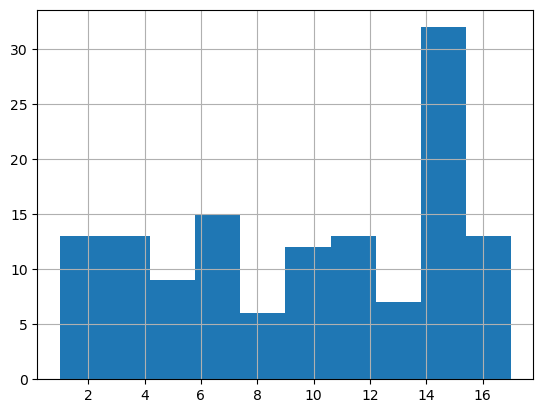

In [78]:
df_most_runs["Mat"].hist();

### Plotting Histogram of Average of Players

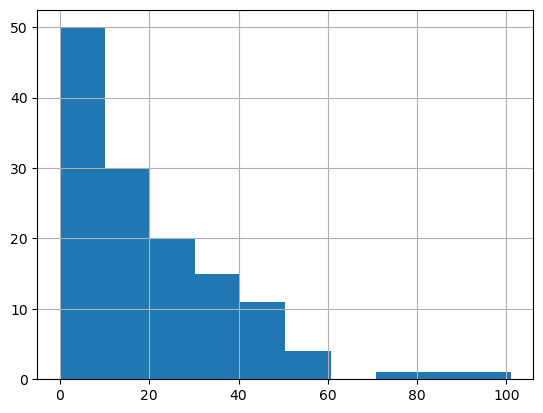

In [80]:
df_most_runs["Avg"].hist();

### Plotting Histogram of Balls Faced by Players

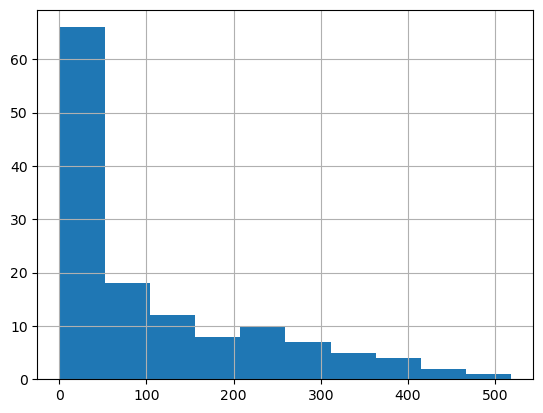

In [81]:
df_most_runs["BF"].hist();

### Top 30 Players with Most Runs in a Season vs Matched Played

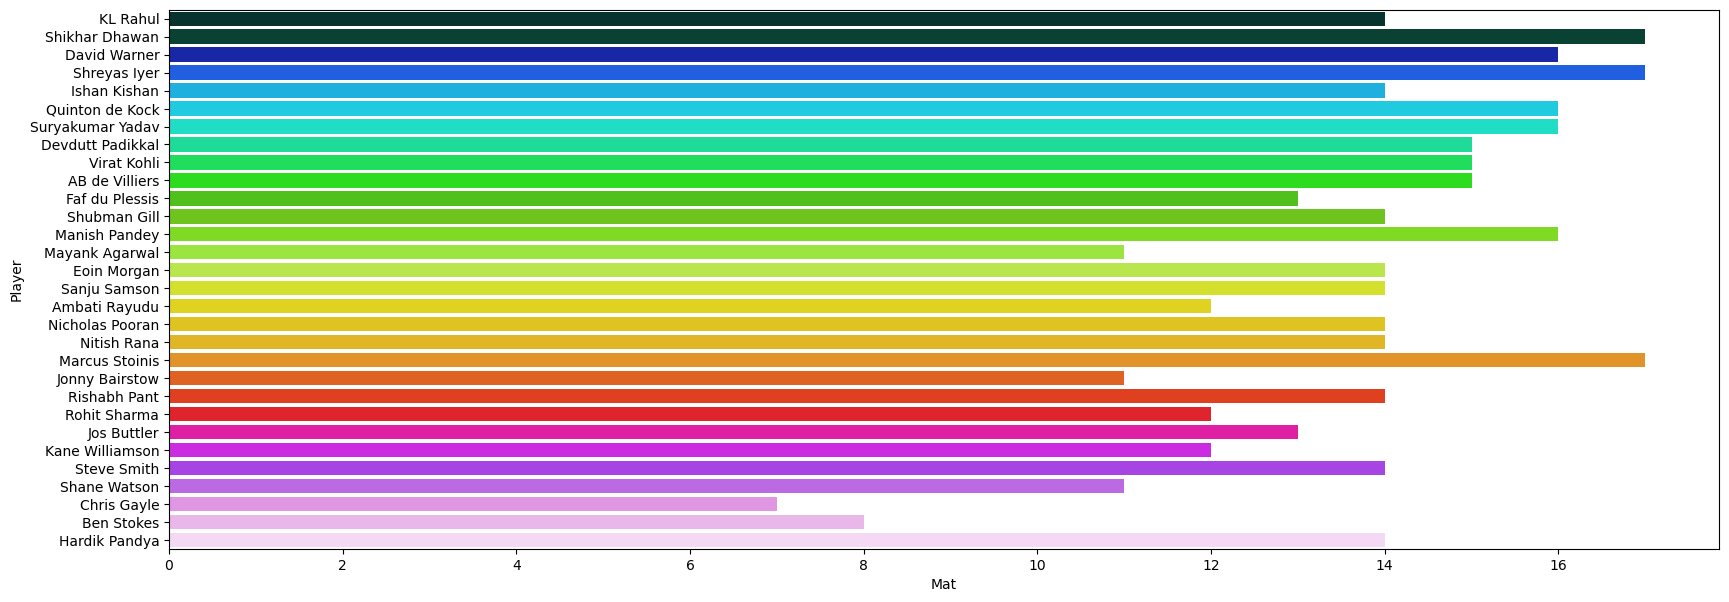

In [6]:
df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Mat'], ascending = False)
plt.figure(figsize = (20, 7))
sns.barplot(x = df_most_runs["Mat"], y = df_most_runs["Player"][:30], palette = "gist_ncar");

### Checking what is the relation between Average of a player and Matches played

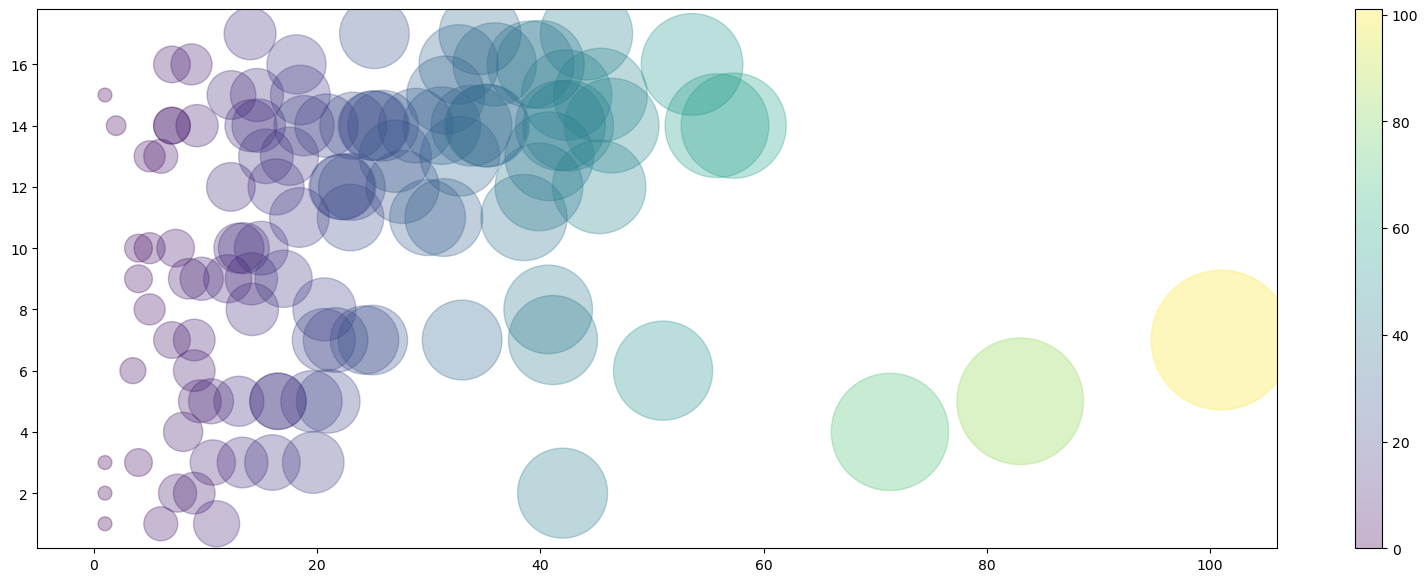

In [7]:
x = df_most_runs["Avg"]
y = df_most_runs["Mat"]
colors = df_most_runs["Avg"]
sizes = 100 * df_most_runs["Avg"]

plt.figure(figsize = (20, 7))
plt.scatter(x,
            y,
            c = colors,
            s = sizes,
            alpha = 0.3,
            cmap = 'viridis')
plt.colorbar();

### Top 30 Players with Most Runs in a Season

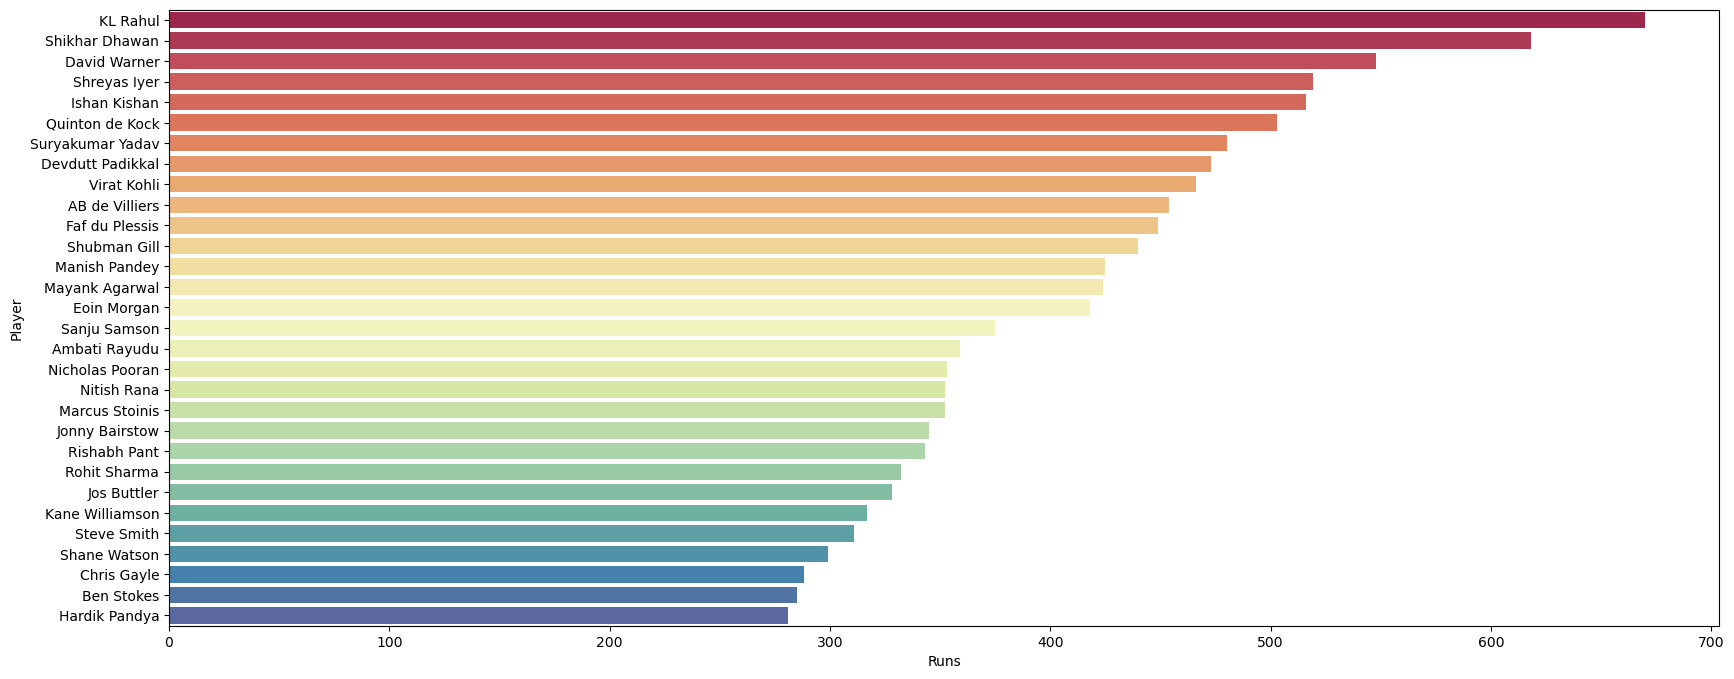

In [84]:
df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Runs'],
                                                        ascending = False)
plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs["Runs"],
            y = df_most_runs["Player"][:30],
            palette = "Spectral");

### Line Plot for Average, Strike Rate and Balls Faced by a players

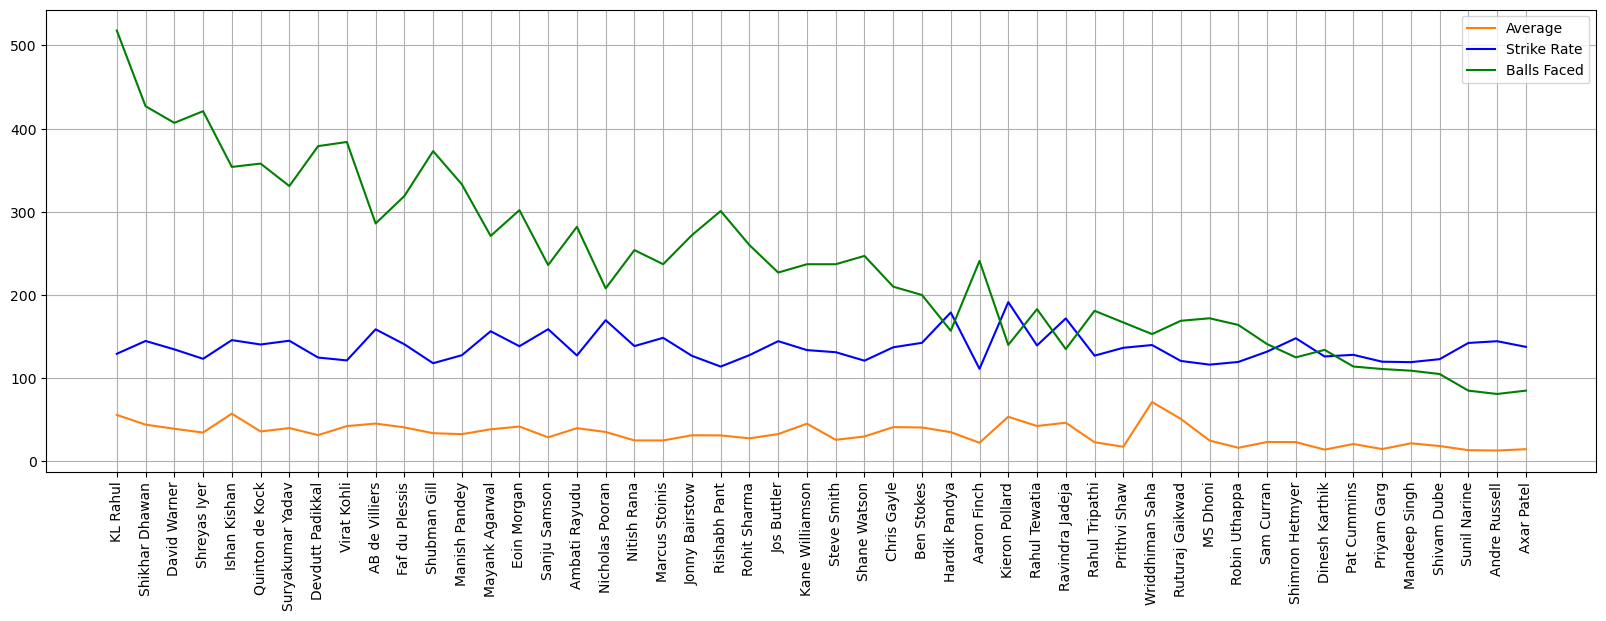

In [85]:
plt.figure(figsize = (20, 6))
plt.plot(df_most_runs["Player"][:50],
         df_most_runs["Avg"][:50],
         color = 'tab:orange')

plt.plot(df_most_runs["Player"][:50],
         df_most_runs["SR"][:50],
         color = 'b')

plt.plot(df_most_runs["Player"][:50],
         df_most_runs["BF"][:50],
         color = 'g')

plt.legend(["Average", "Strike Rate", "Balls Faced"], loc ="upper right")
plt.grid()
plt.xticks(rotation = 90)
plt.show()

### Plotting a Swarmplot plot for No. of Not Outs vs Averages of Players in a Season

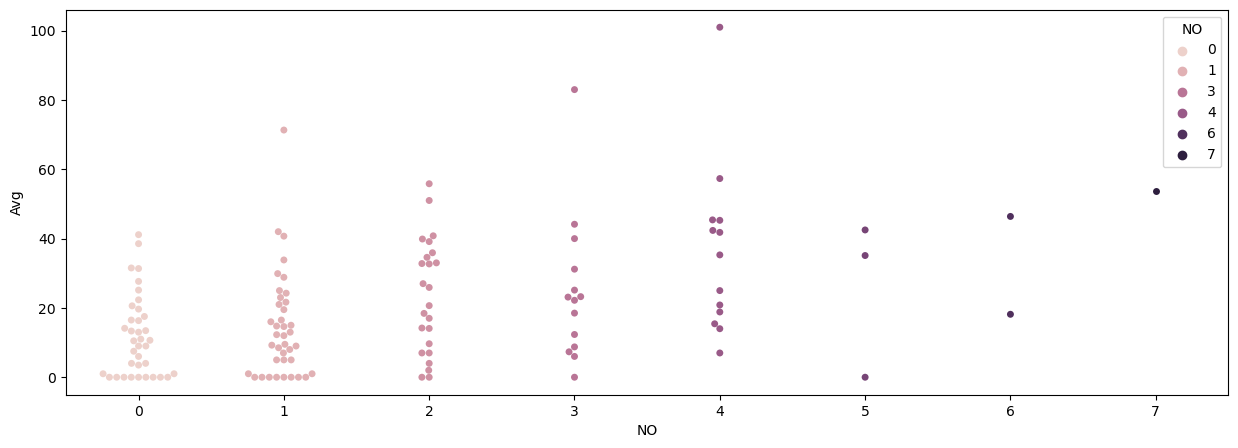

In [99]:
plt.figure(figsize = (15, 5))
sns.swarmplot(x = df_most_runs["NO"], y = df_most_runs["Avg"], hue = df_most_runs["NO"]);

### Bar Plot for Top 20 Players with Best Strike Rates in a Season

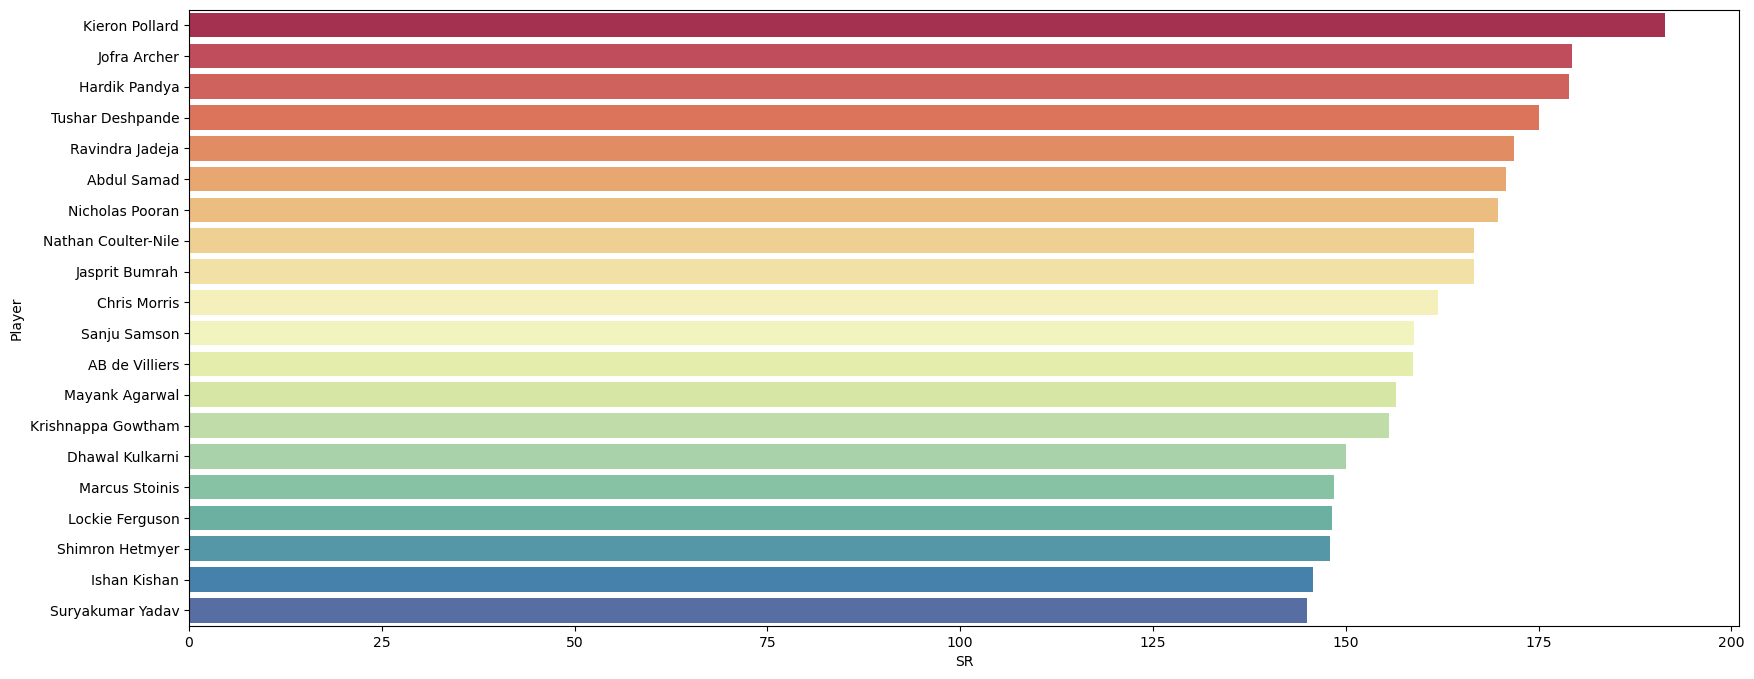

In [89]:
df_most_runs_SR = df_most_runs.loc[:, ["Player", "SR"]]
df_most_runs_SR = df_most_runs_SR.sort_values(by = ['SR'], ascending = False)

df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['SR'], ascending = False)
plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_SR["SR"], y = df_most_runs_SR["Player"][:20], palette = "Spectral");

### Bar Plot for Top 20 Players with Best Averages in a Season

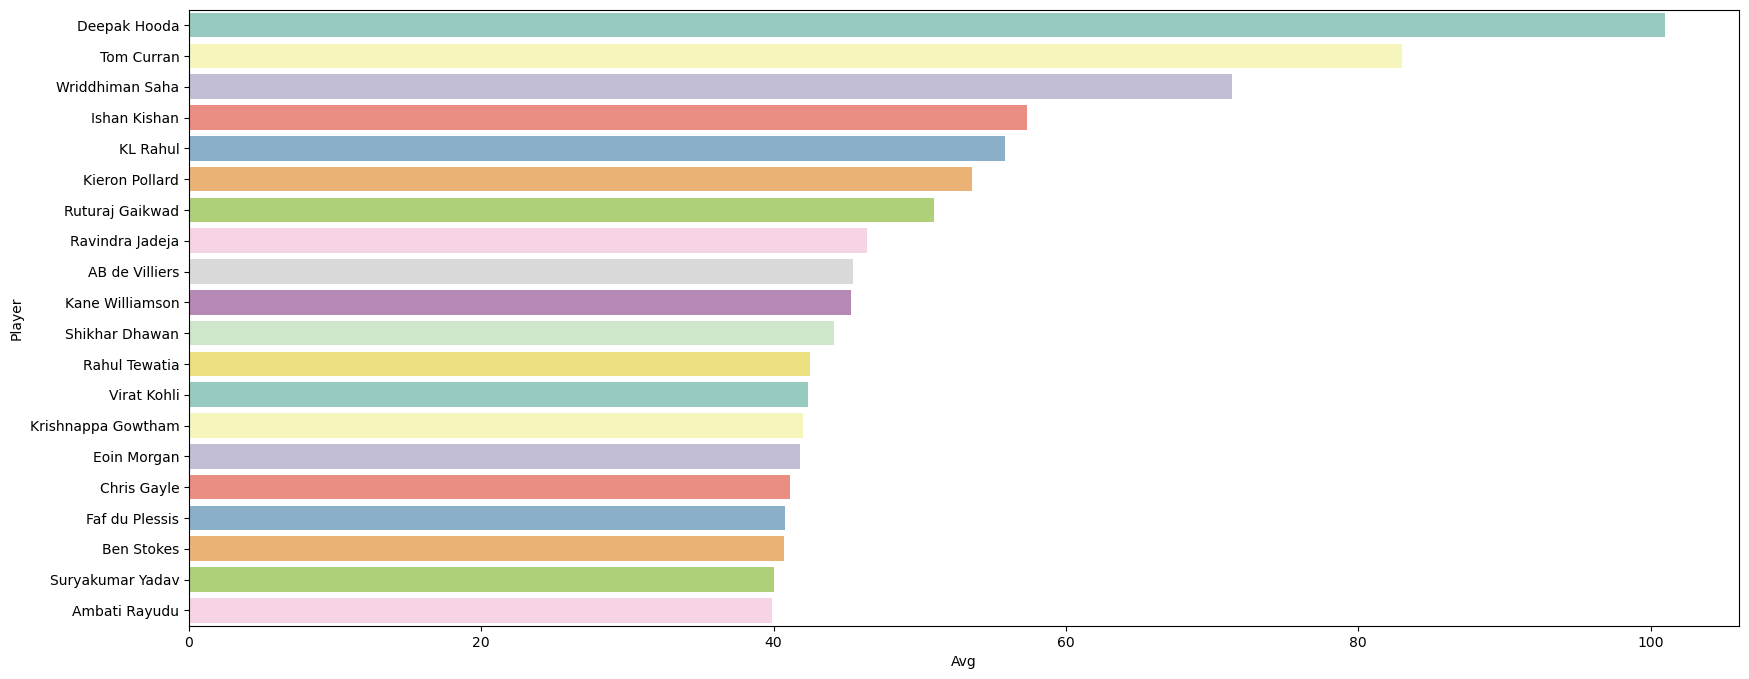

In [90]:
df_most_runs_Avg = df_most_runs.loc[:, ["Player", "Avg"]]
df_most_runs_Avg = df_most_runs_Avg.sort_values(by = ['Avg'], ascending = False)

df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Avg'], ascending = False)
plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_Avg["Avg"], y = df_most_runs_Avg["Player"][:20], palette = "Set3");

#### Removing "*" from the Highest Score column, because otherwise we will not be able to work with it.

In [106]:
df_most_runs_HS = df_most_runs["HS"].str.replace("*", "")
df_most_runs.HS = df_most_runs_HS
df_most_runs.HS = pd.to_numeric(df_most_runs.HS, errors = "coerce")
df_most_runs.head()

Player  Mat  Inns  NO  Runs   HS    Avg   BF      SR  100  50  4s  \
0        KL Rahul   14    14   2   670  132  55.83  518  129.34    1   5  58   
1  Shikhar Dhawan   17    17   3   618  106  44.14  427  144.73    2   4  67   
2    David Warner   16    16   2   548   85  39.14  407  134.64    0   4  52   
3    Shreyas Iyer   17    17   2   519   88  34.60  421  123.27    0   3  40   
4    Ishan Kishan   14    13   4   516   99  57.33  354  145.76    0   4  36   

   6s  
0  23  
1  12  
2  14  
3  16  
4  30

### Bar Plot for Top 20 Players with Highest number of Balls Faced

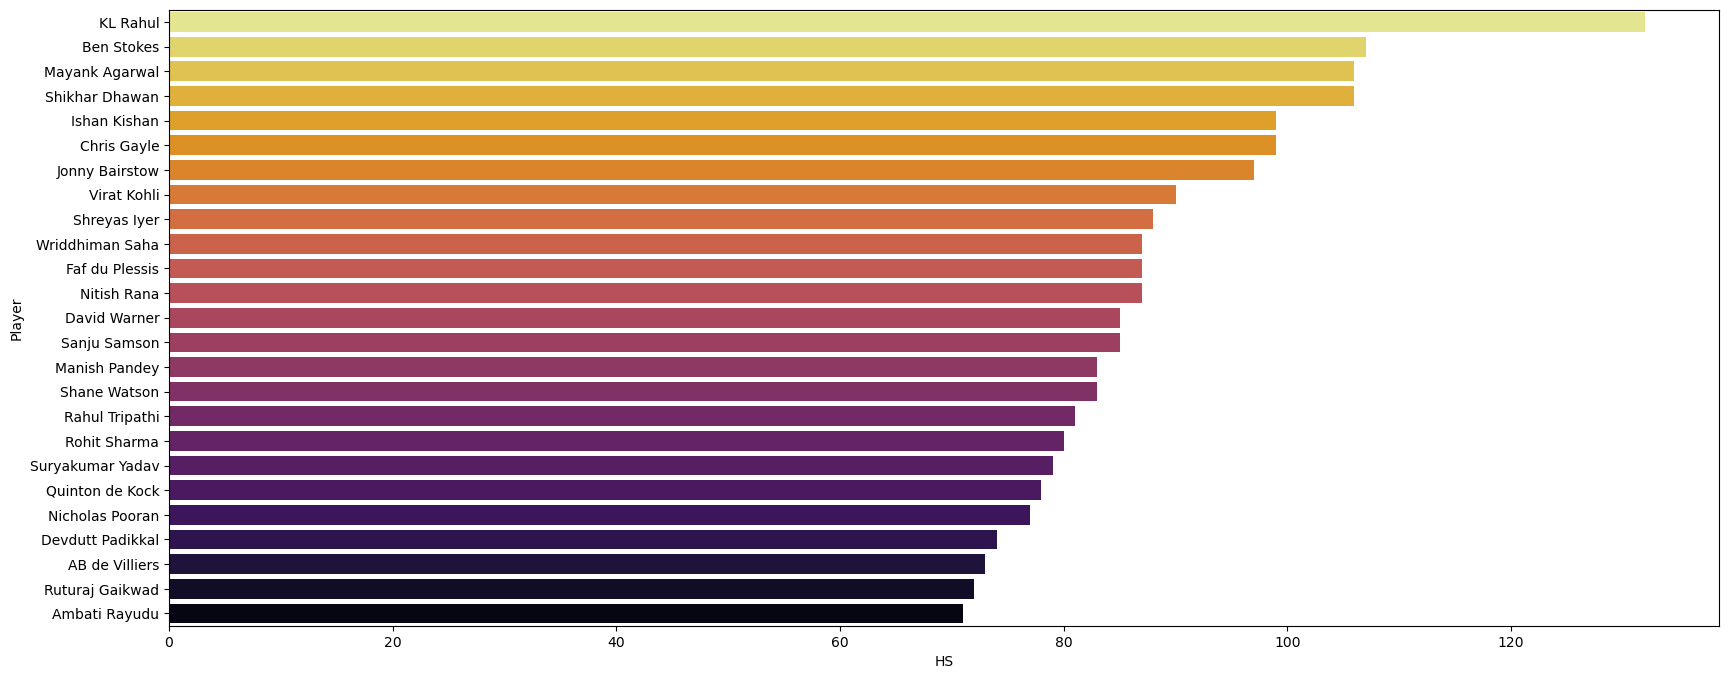

In [107]:
df_most_runs_HS = df_most_runs.loc[:, ["Player", "HS"]]
df_most_runs_HS = df_most_runs_HS.sort_values(by = ['HS'],
                                              ascending = False)

plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_HS["HS"],
            y = df_most_runs_HS["Player"][:25],
            palette = "inferno_r");

### Bar Plot for Top 20 Players with Highest number of Balls Faced

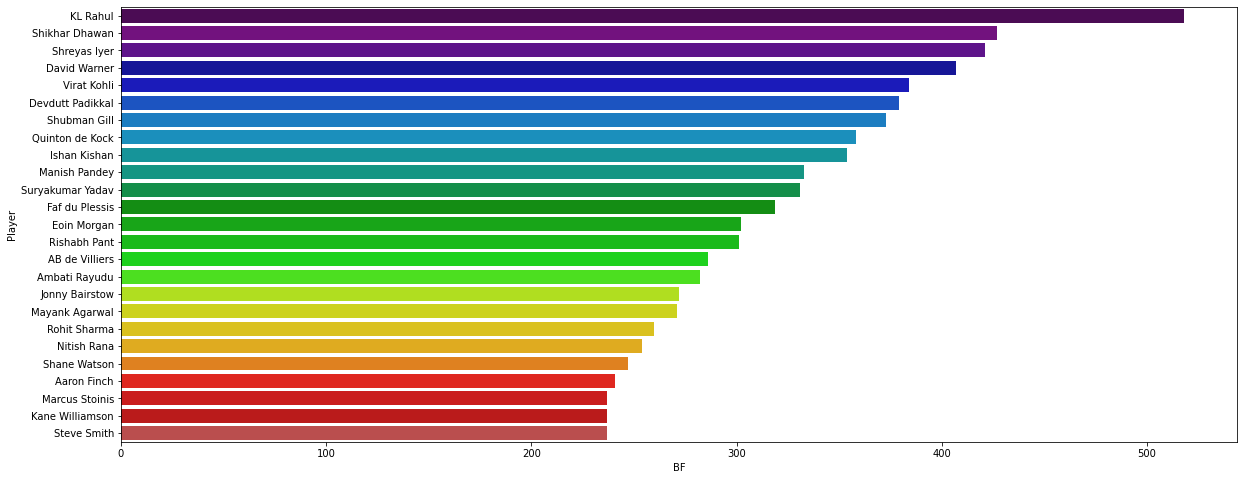

In [34]:
df_most_runs_BF = df_most_runs.loc[:, ["Player", "BF"]]
df_most_runs_BF = df_most_runs_BF.sort_values(by = ['BF'], ascending = False)

plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_BF["BF"], y = df_most_runs_BF["Player"][:25], palette = "nipy_spectral");

### Top 30 Players with Highest Number of 6's

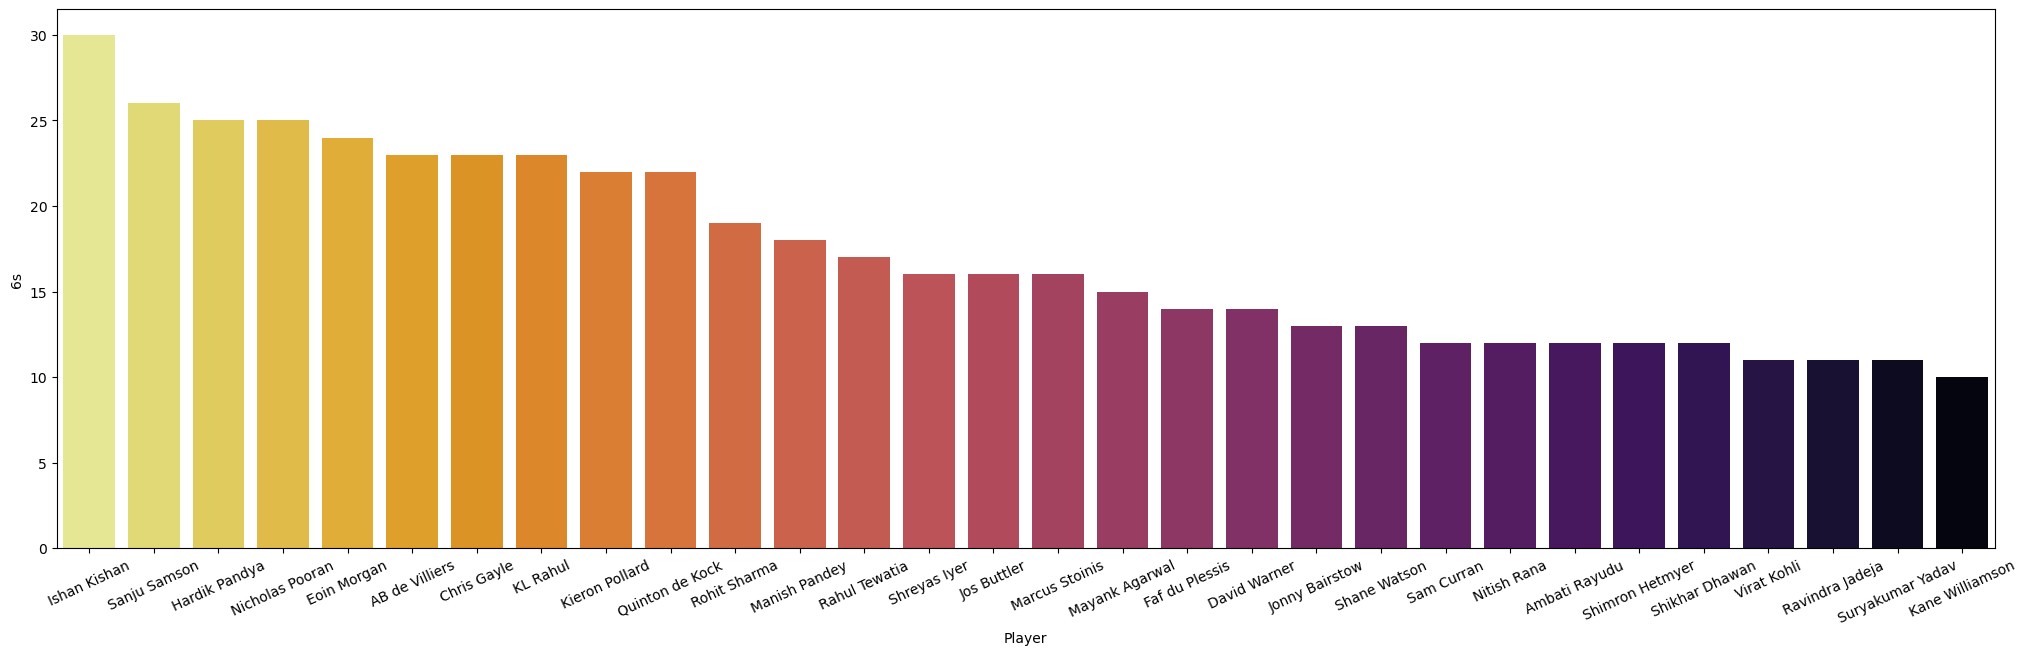

In [108]:
df_most_runs_6s = df_most_runs.loc[:, ["Player", "6s"]]
df_most_runs_6s = df_most_runs_6s.sort_values(by = ['6s'], ascending = False)

plt.figure(figsize = (25, 7))
plt.xticks(rotation = 25)
sns.barplot(x = df_most_runs_6s["Player"][:30], y = df_most_runs_6s["6s"], palette = "inferno_r");

### Top 25 Players with Highest Number of 4's

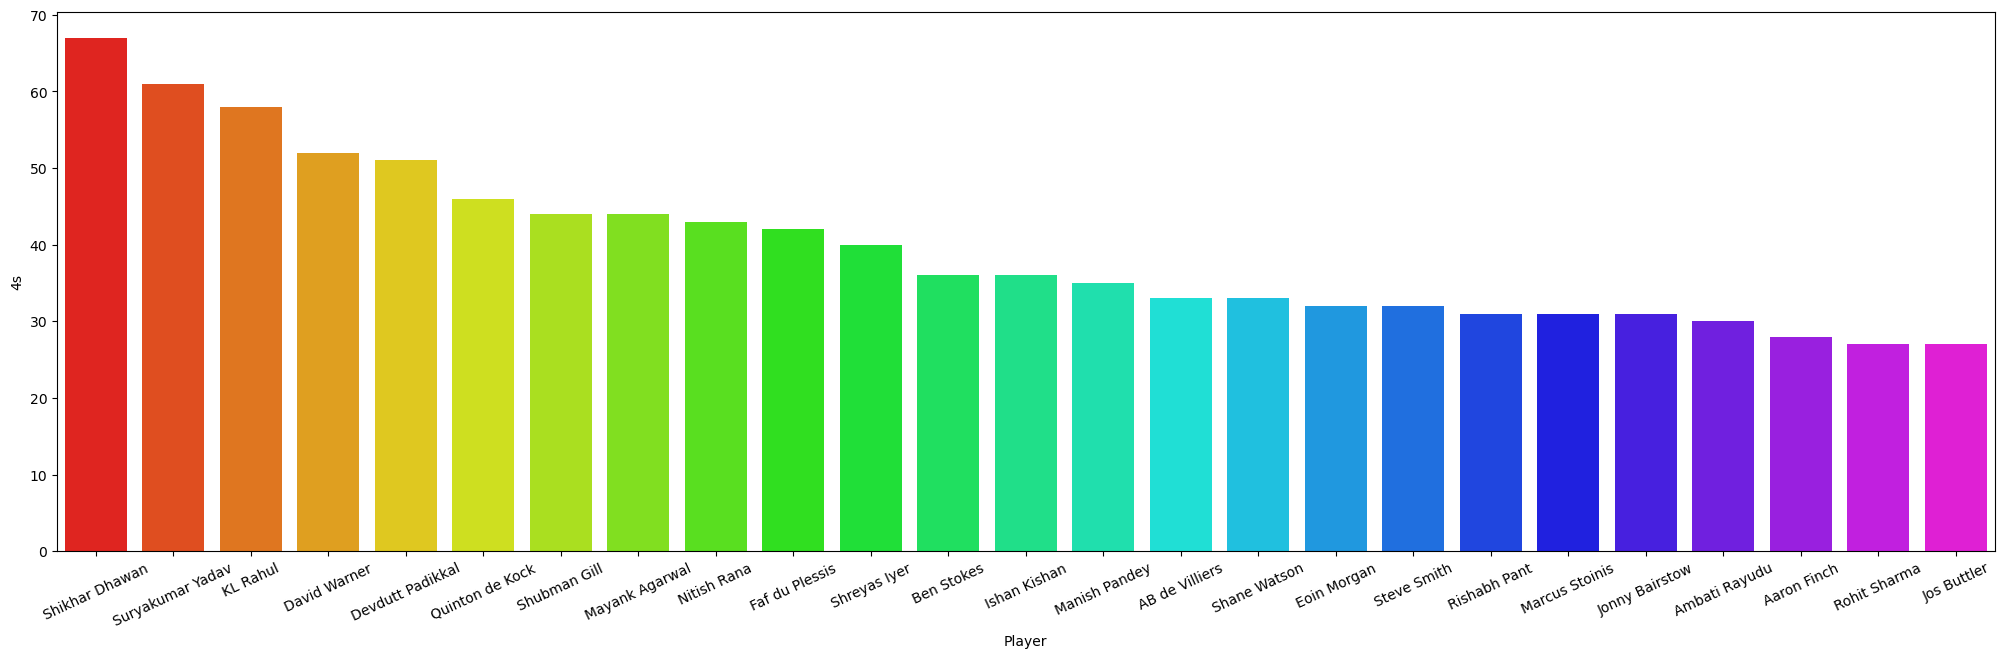

In [109]:
df_most_runs_4s = df_most_runs.loc[:, ["Player", "4s"]]
df_most_runs_4s = df_most_runs_4s.sort_values(by = ['4s'], ascending = False)

plt.figure(figsize = (25, 7))
plt.xticks(rotation = 25)
sns.barplot(x = df_most_runs_4s["Player"][:25], y = df_most_runs_4s["4s"], palette = "gist_rainbow");

### Scatter Plot for Runs scored by a Player vs Balls Faced in a Season

In [8]:
fig = px.scatter(df_most_runs, x = "Runs", y = "BF", color = "Runs")
fig.show()

### Scatter Plot for Runs scored by a Player vs Strike Rates in a Season

In [9]:
fig = px.scatter(df_most_runs, x = "Runs", y = "SR", color = "Runs")
fig.show()

### Scatter Plot for Runs scored by a Player vs Average of a Player in this Season

In [10]:
fig = px.scatter(df_most_runs, x = "Runs", y = "Avg", color = "Runs")
fig.show()

### Pie Chart for Number of Not Outs

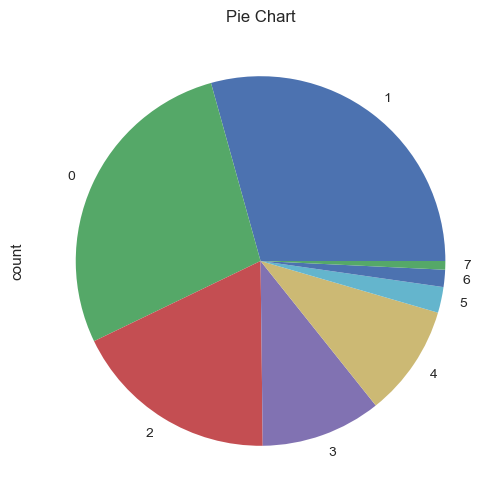

In [114]:
plt.style.use("seaborn")
df_most_runs["NO"].value_counts().plot.pie(figsize = (6, 6))
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

### Pie Chart for Number of 50's scored by players in a season

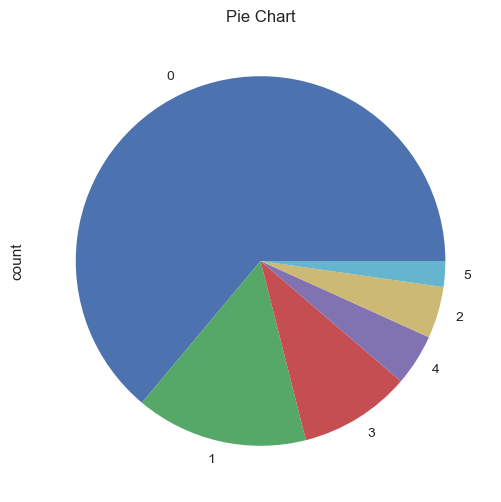

In [115]:
plt.style.use("seaborn")
df_most_runs["50"].value_counts().plot.pie(figsize = (6, 6))
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

### Scatter Plot for Average score of a Player vs Strike

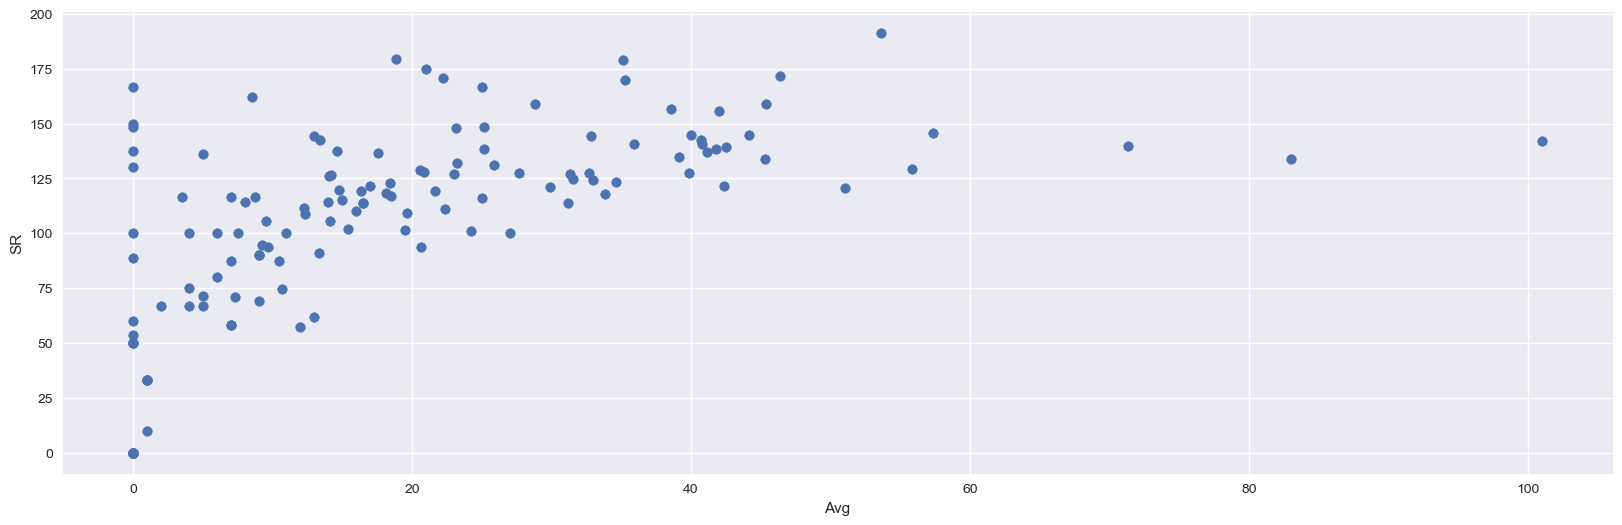

In [116]:
plt.figure(figsize = (20, 6))
plt.scatter(df_most_runs['Avg'], df_most_runs['SR'])
plt.xlabel('Avg')
plt.ylabel('SR')
plt.xticks;

### Box Plots for Runs, Averages, Highest Scores, Strike Rates and Balls Faced by Players in a Season

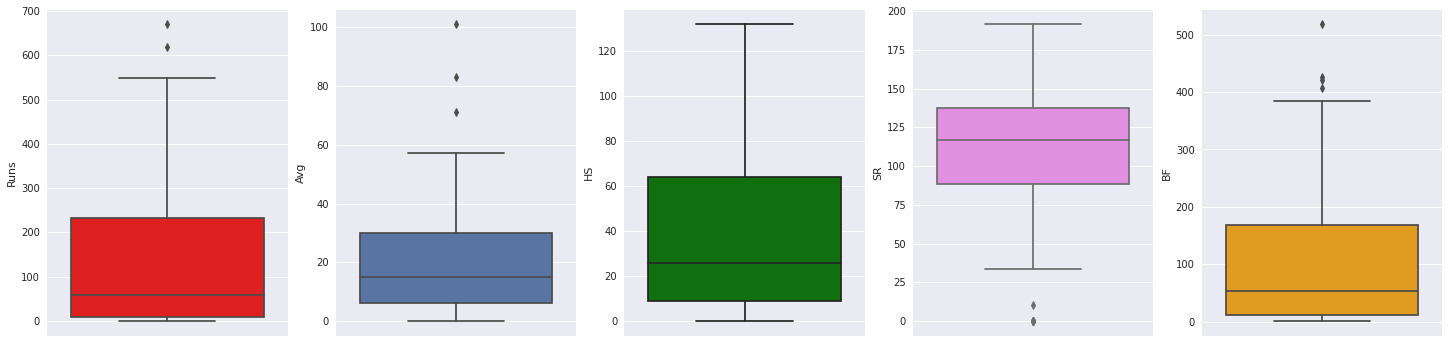

In [43]:
f, axes = plt.subplots(1, 5, figsize = (25, 6))
sns.boxplot(y = df_most_runs["Runs"], orient = 'v', ax = axes[0], color = "red");
sns.boxplot(y = df_most_runs["Avg"], orient = 'v', ax = axes[1]);
sns.boxplot(y = df_most_runs["HS"], orient = 'v', ax = axes[2], color = "green");
sns.boxplot(y = df_most_runs["SR"], orient = 'v', ax = axes[3], color = "violet");
sns.boxplot(y = df_most_runs["BF"], orient = 'v', ax = axes[4], color = "orange");

### Violin Plots for Runs, Averages, Highest Scores, Strike Rates and Balls Faced by Players in a Season

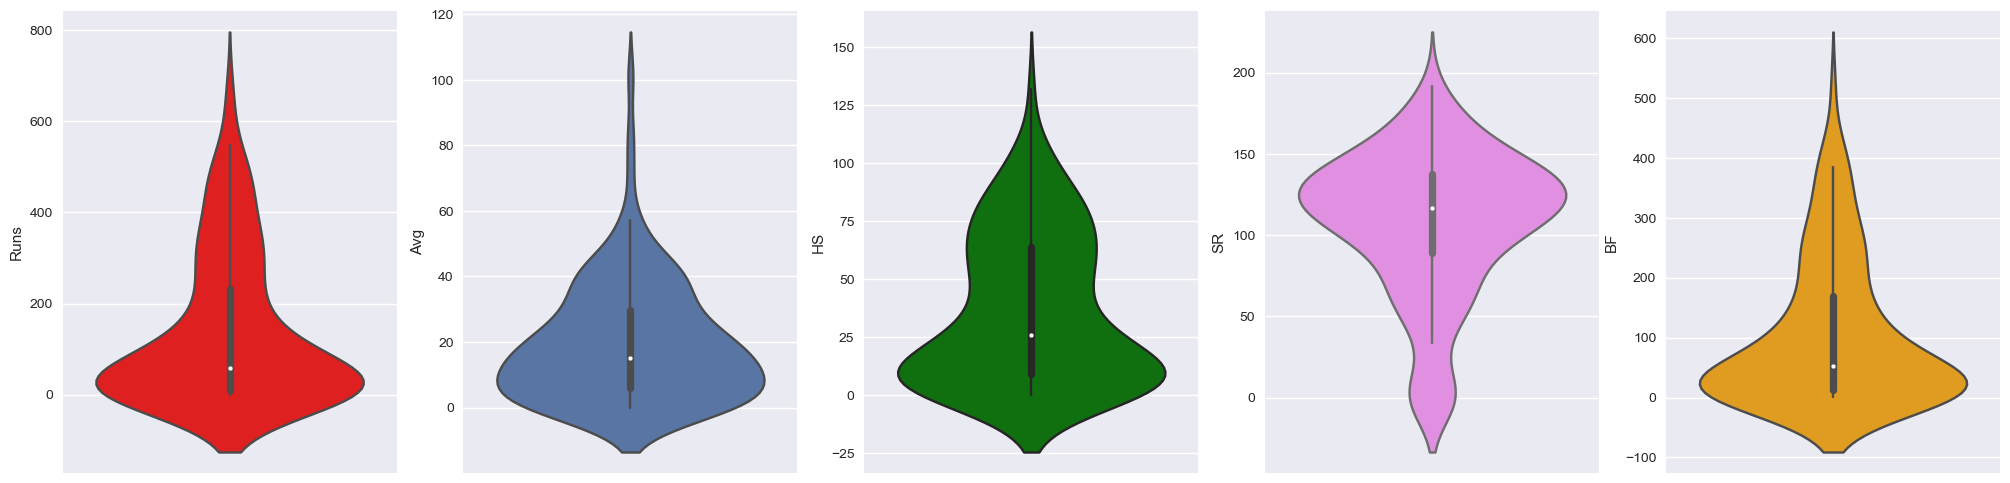

In [117]:
f, axes = plt.subplots(1, 5, figsize = (25, 6))
sns.violinplot(y = df_most_runs["Runs"], orient = 'v', ax = axes[0], color = "red");
sns.violinplot(y = df_most_runs["Avg"], orient = 'v', ax = axes[1]);
sns.violinplot(y = df_most_runs["HS"], orient = 'v', ax = axes[2], color = "green");
sns.violinplot(y = df_most_runs["SR"], orient = 'v', ax = axes[3], color = "violet");
sns.violinplot(y = df_most_runs["BF"], orient = 'v', ax = axes[4], color = "orange");

### Plotting a Histogram for Strike Rates of Players in a Season

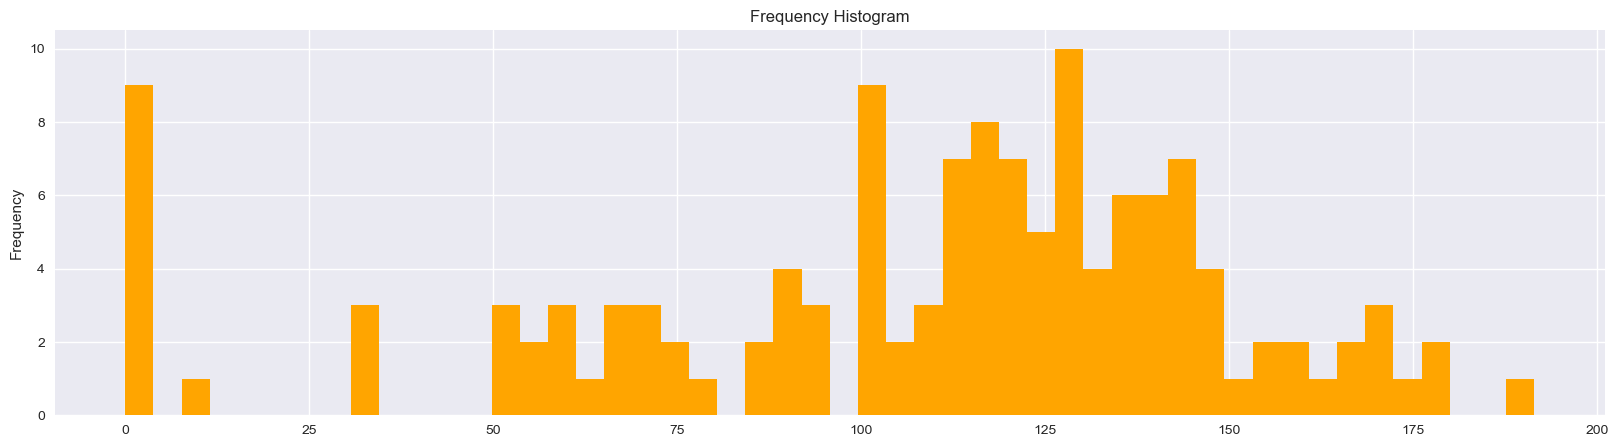

In [118]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(20,5), 'figure.dpi':100})

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.hist(df_most_runs["SR"], bins=50, color = "orange")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

### Plotting a Kernel Density Estimate (KDE) plot for Averages of Players in a Season

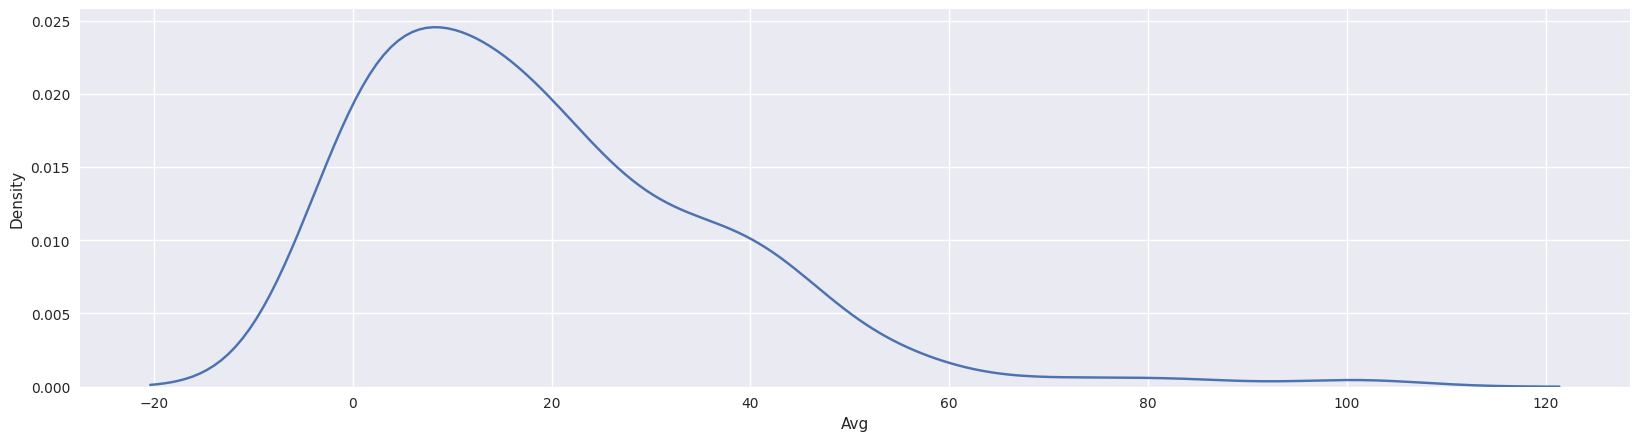

In [46]:
sns.kdeplot(df_most_runs['Avg']);

### Gauge Plot for Top 5 Run Scorer in a Season

In [11]:
player = []
for i in df_most_runs['Player'][:5]:
    player.append(i)

runs = []
for i in df_most_runs['Runs'][:5]:
    runs.append(i)

fig = make_subplots(rows = 2, cols = 3, specs = [[{"type": "Indicator"},
                                                  {"type": "Indicator"},
                                                  {"type": "Indicator"}],
                                                 [{"type": "Indicator"},
                                                  {"type": "Indicator"},
                                                  {"type": "Indicator"}]])

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[0],
                             title = {'text': player[0],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'},
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 1, col = 1)

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[1],
                             title = {'text': player[1],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'}, 
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 1, col = 3)

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[2],
                             title = {'text': player[2],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'}, 
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 2, col = 1)

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[3],
                             title = {'text': player[3],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'},
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 2, col = 2)

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[4],
                             title = {'text': player[4],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'}, 
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 2, col = 3)

fig.update_layout(title = {'y':0.73,
                           'x':0.5,
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'font': {'size': 30}})

fig.update_layout(font = {'color': "darkblue",
                          'family': "Times New Roman"},
                  title_text = "Top 5 Run Scorer")

fig.show()

### Plotting Heatmap for all the Features

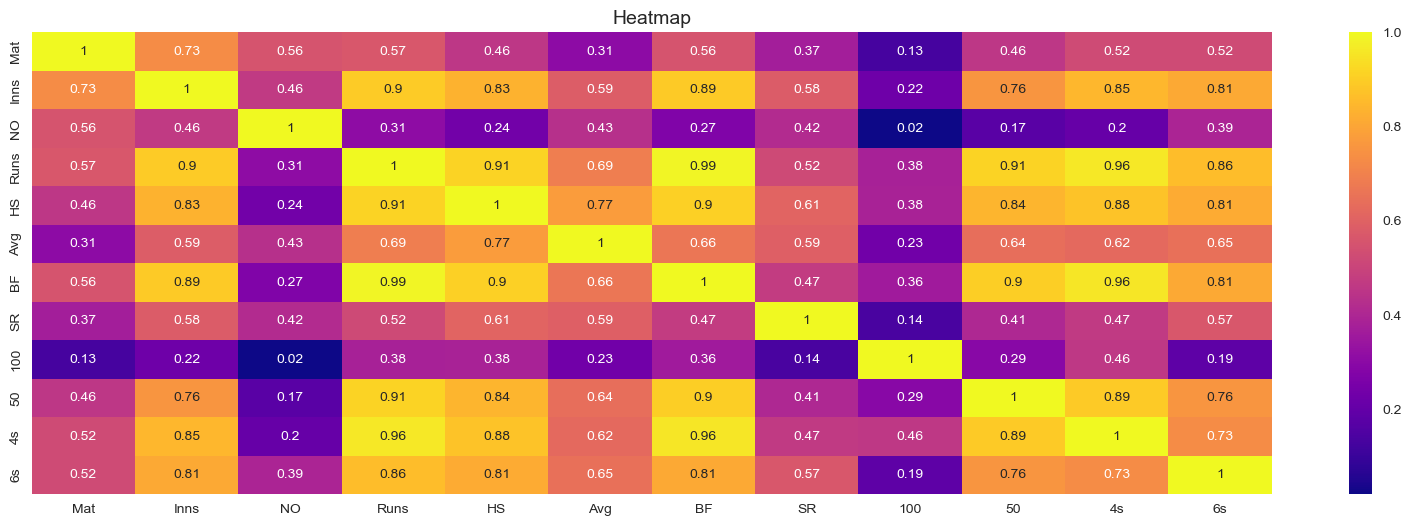

In [125]:
colormap = plt.cm.plasma
temp_df = df_most_runs.select_dtypes(exclude=[object])
corr = temp_df.corr()
plt.figure(figsize = (20, 6))
plt.title('Heatmap', fontsize = 14)
sns.heatmap(corr, cmap = colormap, linecolor = 'white', annot = True);

### Plotting a Tree Map for Number of Matches played by Cricketers

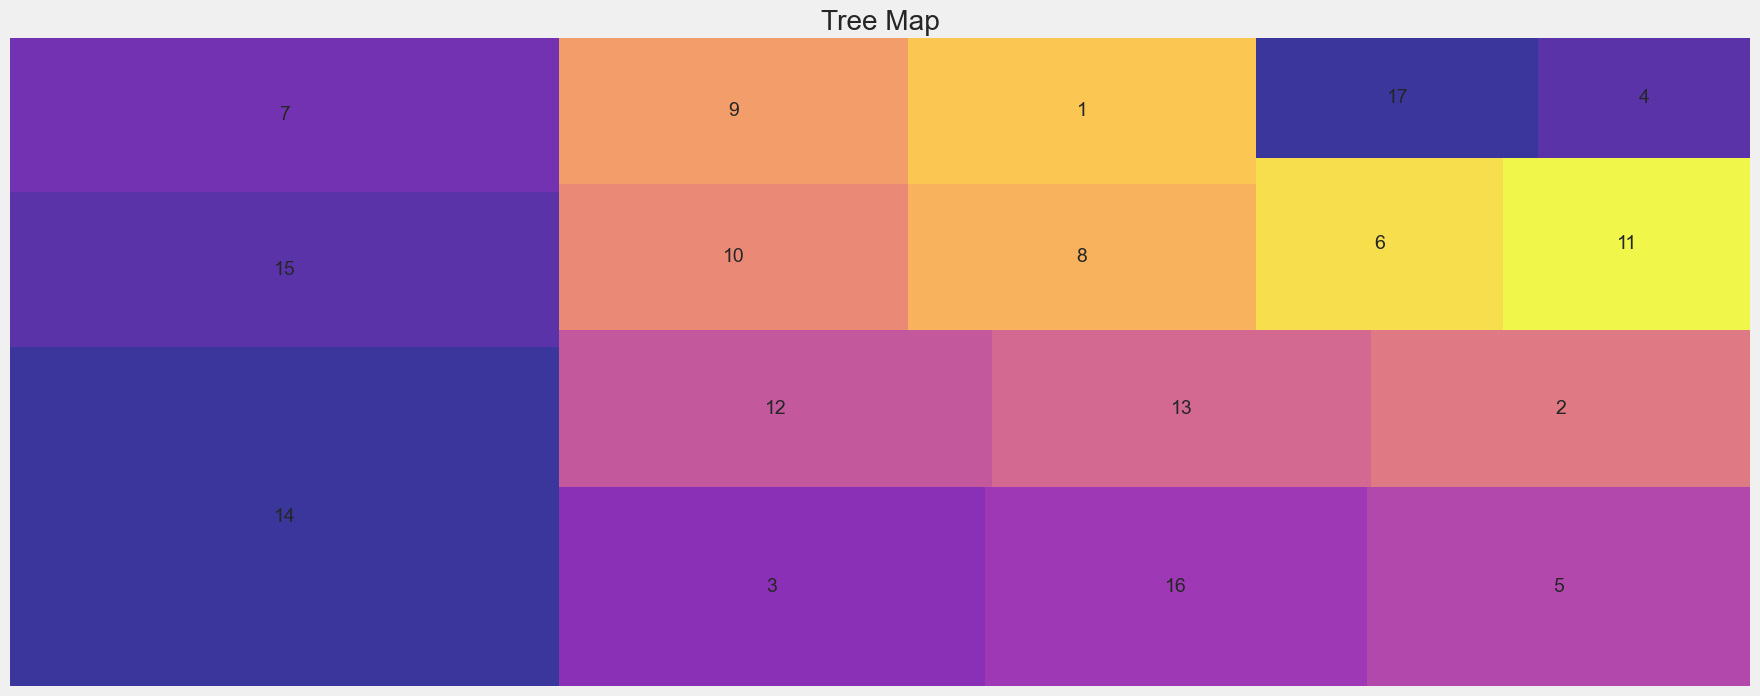

In [127]:
y = df_most_runs["Mat"].value_counts()
plt.rcParams["figure.figsize"] = (20, 8)
plt.style.use("fivethirtyeight")
color = plt.cm.plasma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values,
              label = y.index,
              alpha = 0.8,
              color = color)
plt.title("Tree Map")
plt.axis("off")
plt.show()

 P.S - This EDA only contains the Total Runs in 2020 of a IPL season. There are 12 different csv files with different features like Most Wickets, Best Bowling Economy (Innings), Best Bowling Strike Rate (Innings), Fastest Centuries, Fastest Fifties, Most Runs Conceded (Innings), Most Dot Balls (Innings), Most Runs (Over), Most Sixes (Innings), Most Runs (Over), Most Fours (Innings) all having records from 2008 to 2021.